## 分類器の精度指標

In [1]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# データロード
df = sns.load_dataset('iris')
y_col='species'
X = df.drop(columns=[y_col])
y = df[y_col]
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル学習
model = LogisticRegression(penalty=None)
model.fit(X_train, y_train)
# 予想
y_pred = model.predict(X_test)

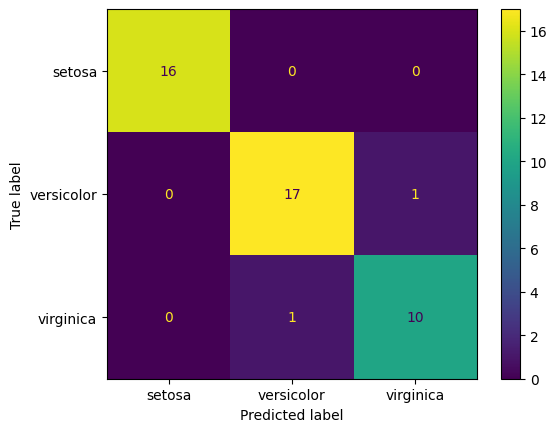

In [5]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [6]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Accuraxy

In [7]:
# サンプルデータ
y_true = [1, 1, 0, 1, 0, 0, 1, 1]
y_pred = [1, 1, 1, 0, 0, 1, 0, 1]

In [8]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.5

## Precision

In [9]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.6

## Recall 

In [10]:
from sklearn.metrics import recall_score
recall_score(y_true, y_pred)

0.6

## Specificity

In [11]:
import numpy as np
np.array(y_true) != 1

array([False, False,  True, False,  True,  True, False, False])

In [12]:
recall_score(np.array(y_true)!=1, np.array(y_pred)!=1)

0.3333333333333333

## 多クラス評価におけるPrecision

In [13]:
# データロード
df = sns.load_dataset('iris')
y_col='species'
X = df.drop(columns=[y_col])
y = df[y_col]
# hold-out
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# モデル学習
model = LogisticRegression(penalty=None)
model.fit(X_train, y_train)
# 予想
y_pred = model.predict(X_test)

In [19]:
# average=None
print(precision_score(y_test, y_pred, average=None))
# verage=macro
print(precision_score(y_test, y_pred, average='macro'))
# verage=micro
print(precision_score(y_test, y_pred, average='micro'))
# same as accuracy
print(accuracy_score(y_test, y_pred))

[1.         0.94444444 0.90909091]
0.9511784511784511
0.9555555555555556
0.9555555555555556


In [15]:
model.classes_

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [17]:
precision_score(y_test, y_pred, average=None).mean()

0.9511784511784511

## Precision Recall Curve

In [23]:
import pandas as pd

df = pd.read_csv('../csv/heart_preprocessed.csv')

In [27]:
y_col = 'target'
X = df.drop(columns=[y_col])
y = df[y_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# モデルの構築
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
y_pred_proba = model.predict_proba(X_test)

In [38]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:, 1])

Text(0.5, 1.0, 'Precision Recall Curve')

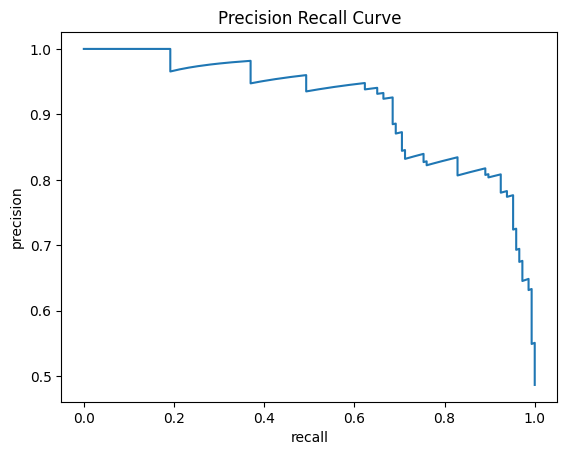

In [45]:
import matplotlib.pyplot as plt
plt.plot(recall, precision)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('Precision Recall Curve')

## F値

In [55]:
from sklearn.metrics import f1_score, recall_score, precision_score
y_true = [1,0,0,1,0,0,1,1]
y_pred = [1,1,1,0,0,1,0,1]

In [56]:
f1_score(y_true, y_pred)

0.4444444444444445

In [57]:
# 調和平均

from scipy.stats import hmean
hmean([recall_score(y_true, y_pred), precision_score(y_true, y_pred)])

0.4444444444444444

In [58]:
recall_score(y_true, y_pred)

0.5

In [59]:
precision_score(y_true, y_pred)

0.4